# KNN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터 준비

In [ ]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
print(df.shape)

(344, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df['species'].value_counts() # 펭귄의 종류

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### 결측치 제거

In [ ]:
df.isnull().sum(axis=0) # null 확인

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
df = df.dropna() # 결측치가 포함된 행을 삭제
df.isnull().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### 레이블 인코딩

In [ ]:
# species
df['species'] = df['species'].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
# island
df['island']= df['island'].map({'Biscoe':0,'Dream':1, 'Torgersen':2})
# sex
df['sex']= df['sex'].map({'Female':0,'Male':1})

df.head()

<ipython-input-10-a157cbfb96e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
<ipython-input-10-a157cbfb96e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island']= df['island'].map({'Biscoe':0,'Dream':1, 'Torgersen':2})
<ipython-input-10-a157cbfb96e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


### 시각화

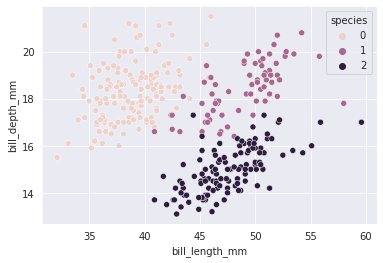

In [ ]:
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species')
plt.show()

# 'bill_length_mm', 'bill_depth_mm' 에 따라 종이 달라지는 것을 확인할 수 있음.

### 피처 속성, 레이블 분리 

In [ ]:
X = df.drop(['species'], axis=1)
y = df['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1


### 트레이닝, 테스트 데이터 분리

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42) # random_state : seed값

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(313, 6) (20, 6)
(313,) (20,)


### 스케일링
(https://wooono.tistory.com/96)
- 머신러닝을 위한 데이터셋을 정제할 때, 특성별로 데이터의 스케일이 다르다면 어떤 일이 벌어질까요?
- 예를 들어,
  - X1은 0 부터 1 사이의 값을 갖고
  - X2 는 1000000 부터 1000000000000 사이의 값을 갖고
  - y 는 1000000 부터 100000000 사이의 값을 갖는다고 가정한다면
X1 특성은 y 를 예측하는데 큰 영향을 주지 않는 것으로 생각할 수 있습니다.
- 때문에 특성별로 데이터의 스케일이 다르다면, 머신러닝이 잘 동작하지 않을 수 있습니다.
- 따라서, 저희는 데이터 스케일링 작업을 통해, 모든 특성의 범위(또는 분포)를 같게 만들어줘야합니다.

In [ ]:
X_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
115,0,42.7,18.3,196.0,4075.0,1
143,1,40.7,17.0,190.0,3725.0,1
323,0,49.1,15.0,228.0,5500.0,1
205,1,50.7,19.7,203.0,4050.0,1
6,2,38.9,17.8,181.0,3625.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = y_train.values # values
X_train[:3, :]

array([[-0.89919225, -0.24168425,  0.5740843 , -0.36122883, -0.17338991,
         0.97788036],
       [ 0.51511516, -0.60712952, -0.08878432, -0.7865503 , -0.60338117,
         0.97788036],
       [-0.89919225,  0.9277406 , -1.1085822 ,  1.90715234,  1.57728882,
         0.97788036]])

In [ ]:
X_test = sc.transform(X_test)
y_test = y_test.values

## 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 예측

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2]


## 평가

In [ ]:
(y_test == y_pred).sum()

19

### 혼동행렬 표시

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
print(cf)

[[8 1 0]
 [0 5 0]
 [0 0 6]]


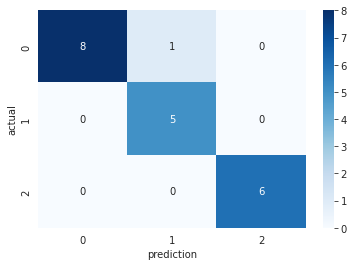

In [ ]:
s = sns.heatmap(cf, annot=True, cmap='Blues')
s.set(xlabel='prediction', ylabel='actual')
plt.show()

### 정확도

In [ ]:
from sklearn.metrics import *

# 정확도 Accuracy : 전체 데이터 수 중 예측 결과와 실제 값이 동일한 건수(TN + TP)가 차지하는 비율 
acc = accuracy_score(y_test, y_pred)
print(f"정확도 : {acc}")

# 재현율 Precision : 맞다고 예측한것 중, 실제로 얼마나 true positive 가 많은가 (= 즉, positive 예측을 얼마나 맞췄냐)
pre = precision_score(y_test, y_pred, average='macro')
print(f"재현율 : {pre}")

# 정밀도 Recall : actual positive (= true pos, false neg) 중에, 우리가 얼마나 맞게 예측을 했는가
recall = recall_score(y_test, y_pred, average='macro')
print(f"정밀도 : {recall}")

정확도 : 0.95
재현율 : 0.9444444444444445
정밀도 : 0.9629629629629629
